In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.10f}'.format)

In [3]:
training_data=pd.read_csv("Seniors.csv")
training_data=training_data.drop("Unnamed: 0",axis=1)
training_data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.7627007855,8.0508553723,1688.7691665199,44522.2170742668,9229575.9601601008,99.9999705167
1,243.0378732745,15.8120683725,3842.9314693203,63020.7649966678,14355367.1611697152,99.9857034148
2,220.5526752143,7.8431300452,1729.8233135322,49125.9502489843,10728388.6921752859,99.9997576098
3,208.9766365994,23.7860891938,4970.7369175792,57128.8815472062,9125701.9540875833,99.9999748371
4,184.7309598678,15.7978122122,2918.3450137730,38068.2012825077,6303791.8864188669,99.9999998583


In [4]:
testing_data=pd.read_csv("Juniors.csv")
testing_data=testing_data.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)
testing_data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,270.2646875764,11.0237627257,2979.3337889794,74382.6458676431,19740822.4163673595
1,147.1134401010,24.8518986490,3656.0483032897,36991.3160274551,3183265.0410980880
2,251.6366939788,19.8619832948,4998.0038121557,71156.5459979120,15933499.0823472515
3,226.7650226310,23.3012269930,5283.9032663978,64073.7109607777,11660253.1942936312
4,291.0252068945,16.8968946742,4917.4222684278,89519.8198005435,24648289.6847623996


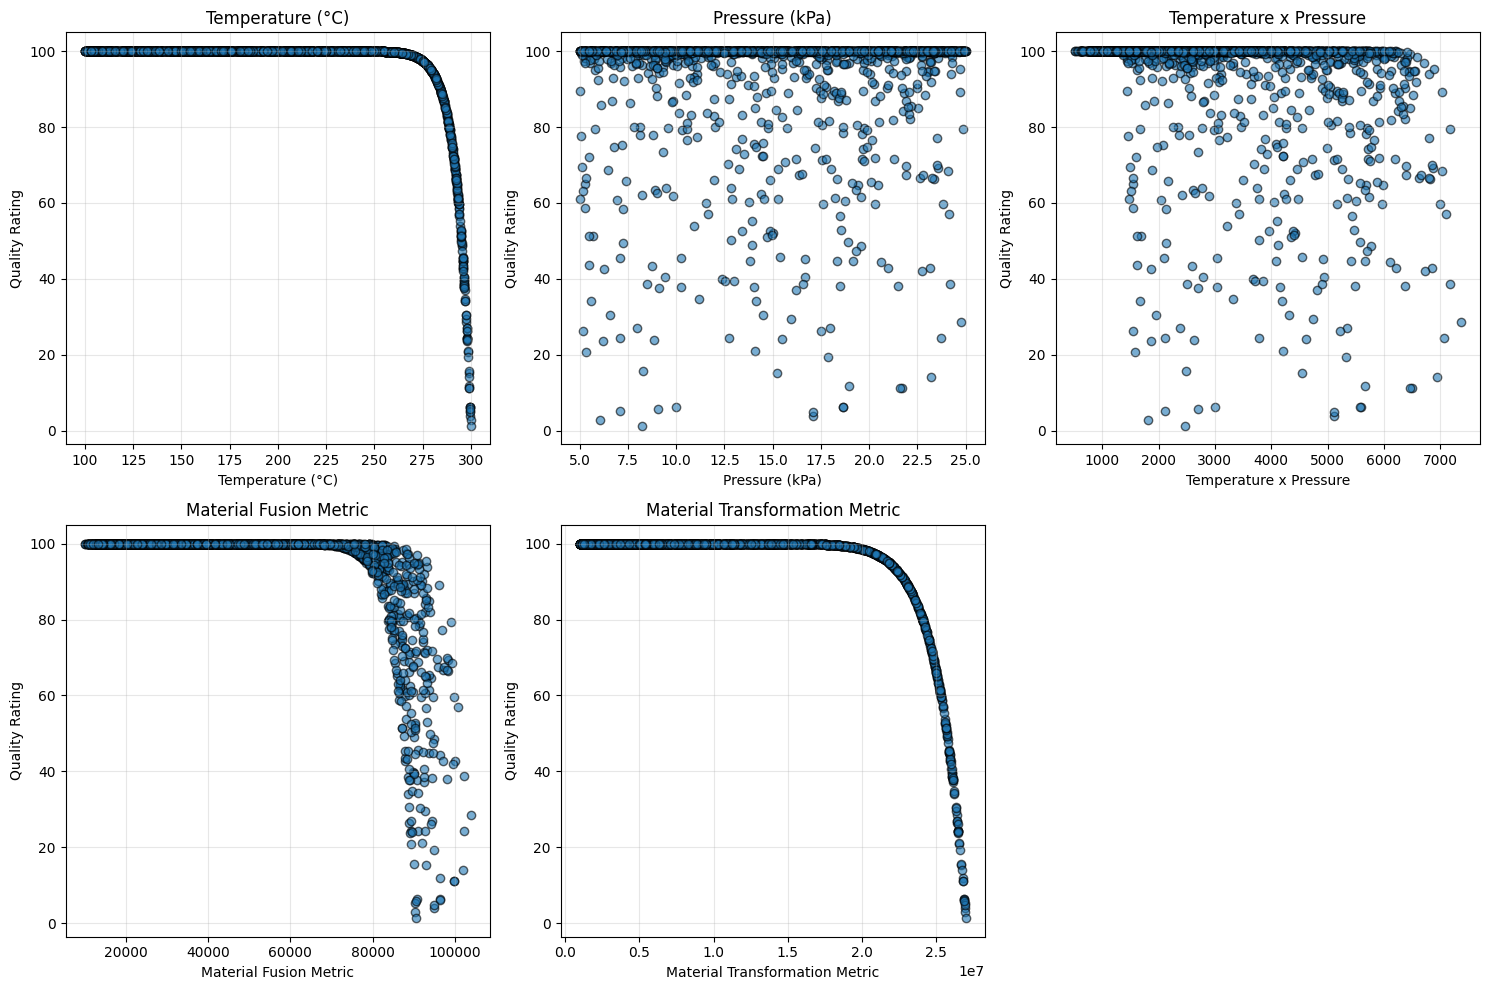

In [5]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(training_data.columns.drop("Quality Rating"), 1):
    plt.subplot(2, 3, i)
    plt.scatter(training_data[feature], training_data["Quality Rating"], alpha=0.6, edgecolor='k')
    plt.title(feature, fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel("Quality Rating", fontsize=10)
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [6]:
training_scaled_features = training_data.columns.drop('Quality Rating') 
training_data[training_scaled_features] = (training_data[training_scaled_features] - training_data[training_scaled_features].mean()) / training_data[training_scaled_features].std()
X_train=training_data[training_scaled_features]
Y_train=training_data["Quality Rating"]
training_data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,0.1553996139,-1.1832189876,-0.8743599853,-0.1605953950,-0.1195354729,99.9999705167
1,0.7230806092,0.1772408211,0.5996778267,0.6084494658,0.5480332937,99.9857034148
2,0.3394787024,-1.2196310741,-0.8462676893,0.0307967809,0.0756657219,99.9997576098
3,0.1419892041,1.5750036245,1.3714060634,0.3635046892,-0.1330637341,99.9999748371
4,-0.2716468154,0.1747418647,-0.0329928844,-0.4289098431,-0.5005814400,99.9999998583


In [7]:
testing_data = (testing_data-testing_data.mean()) / testing_data.std()
X_test=testing_data
testing_data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,1.2440473679,-0.6483093395,0.0297978882,1.1412761793,1.3262434206
1,-0.9049373095,1.7004421678,0.4955163023,-0.4571069974,-0.8930508959
2,0.9189895741,0.8528896651,1.4190569952,1.0033687077,0.8159283514
3,0.4849798363,1.4370558076,1.6158144722,0.7005957276,0.2431632933
4,1.6063176561,0.3492602239,1.3636003618,1.7883514307,1.9840164224


In [8]:
np.set_printoptions(precision=20)


In [9]:
def add_diff_degree(degree,X):
    for i in X.columns:
        for j in range(2,degree+1):
            X[f"{i}**{j}"]=X[i]**j
    return X

In [10]:
Y_train=Y_train.to_numpy()

In [11]:
def calculate_r2(y_true, y_pred):
    r2 = 1 - (np.sum(np.square(y_true - y_pred)) / np.sum(np.square(y_true - np.mean(y_true))))
    return  r2

In [12]:
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(weights) + bias 
        errors = predictions - y
        weight_gradient = (1 / m) * X.T.dot(errors)
        bias_gradient = (1 / m) * np.sum(errors)
        
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

        cost=(1 / (2 * m)) * np.sum((predictions - y) ** 2)
        cost_history[i] = cost
       
    return weights, bias, cost_history, calculate_r2(y, predictions)


In [13]:
def predict(X, weights, bias):
    pred = X.dot(weights) + bias 
    pred = np.clip(pred, 0, 100)
    return pred

In [14]:
learning_rate = 0.01
iterations = 5000
max_degree=7

In [15]:
def plot_graph_of_diff_degree_polynomial_cost_vs_iter(max_degree,X_train,Y_train,learning_rate,iterations):
    plt.figure(figsize=(13,5))
    r2_list=[]
    for d in range(1,max_degree+1):
        X_train_temp=add_diff_degree(d,X_train.copy())
        X_train_temp=(X_train_temp-X_train_temp.mean())/X_train_temp.std()

        weights = np.zeros(X_train_temp.shape[1])  
        bias = 0.0
        X_train_temp=X_train_temp.to_numpy()
        
        weights, bias, cost_history,r2 = gradient_descent(X_train_temp, Y_train,weights,bias, learning_rate, iterations)
        r2_list.append(r2)
    for i in range(max_degree):
        print(f"Accuracy for Degree {i+1} polynomial: {r2_list[i]*100}")
    degree_list=[ f"Degree {i}" for i in range(1,max_degree+1)]
    plt.bar(degree_list, np.array(r2_list)*100)
    plt.title("Accuracy vs Degress for Different Polynomial Degrees")
    plt.xlabel("Degrees")
    plt.ylabel("Accuracy")
    plt.show()
    return weights,bias
    

Accuracy for Degree 1 polynomial: 49.742152799851794
Accuracy for Degree 2 polynomial: 75.76852112256307
Accuracy for Degree 3 polynomial: 89.3159791673837
Accuracy for Degree 4 polynomial: 95.26720795717767
Accuracy for Degree 5 polynomial: 97.77819859838424
Accuracy for Degree 6 polynomial: 99.04393257115053
Accuracy for Degree 7 polynomial: 99.576371849257


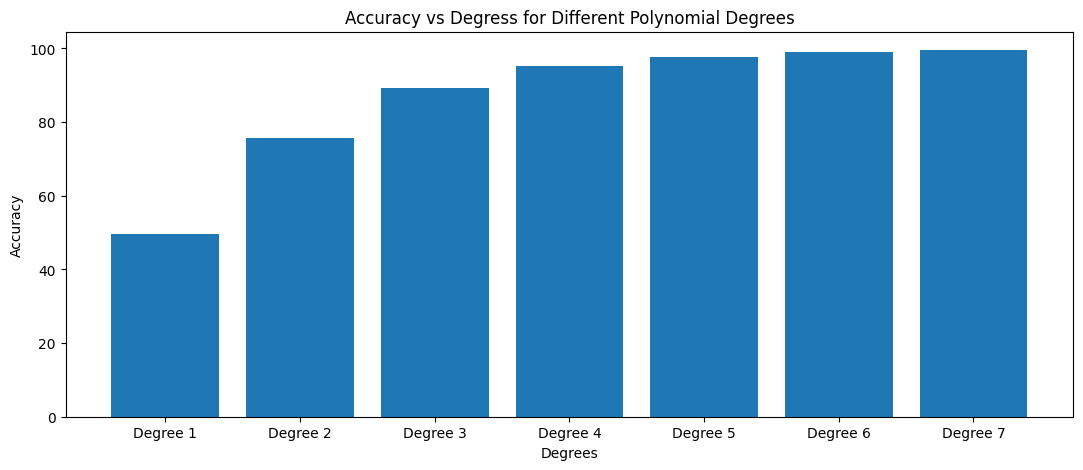

In [16]:
weights,bias = plot_graph_of_diff_degree_polynomial_cost_vs_iter(max_degree,X_train,Y_train,learning_rate,iterations)

In [17]:
degree=max_degree

In [18]:
print("Weights",weights)
print("bias",bias)

Weights [-0.23033477436168986   0.009379162181752743 -0.03306133968345592
 -0.30081819423174516  -0.31484381764393327  -0.6459674386294467
  1.0171332847685752    1.0171142496398426    0.7851454511778686
 -0.12692432290773034  -0.7147723836629355    0.04782125836238245
  0.14381294116058357  -0.010875430339467881  0.024654167012244578
  0.07557465928638375  -0.05566882810861544  -0.19793987527317403
 -0.4865586757593437   -0.27226899038178937  -0.09485646258978207
  0.06374577449008088   0.20104835688440095   0.14357371294111035
  1.3558135495133765    1.3291455185333185    0.6889255273139893
 -0.11612897069256167  -1.0272978489203526    0.93789383324137
  1.327510689122505    -0.5284036622416414   -2.7257205985772903
 -5.6349151956590084   -8.379256463060486   ]
bias 96.03930744441571


In [19]:
X_test=add_diff_degree(degree,X_test)
X_test=(X_test-X_test.mean())/X_test.std()
print(X_test.columns)
X_test=X_test.to_numpy()


Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric',
       'Temperature (°C)**2', 'Temperature (°C)**3', 'Temperature (°C)**4',
       'Temperature (°C)**5', 'Temperature (°C)**6', 'Temperature (°C)**7',
       'Pressure (kPa)**2', 'Pressure (kPa)**3', 'Pressure (kPa)**4',
       'Pressure (kPa)**5', 'Pressure (kPa)**6', 'Pressure (kPa)**7',
       'Temperature x Pressure**2', 'Temperature x Pressure**3',
       'Temperature x Pressure**4', 'Temperature x Pressure**5',
       'Temperature x Pressure**6', 'Temperature x Pressure**7',
       'Material Fusion Metric**2', 'Material Fusion Metric**3',
       'Material Fusion Metric**4', 'Material Fusion Metric**5',
       'Material Fusion Metric**6', 'Material Fusion Metric**7',
       'Material Transformation Metric**2',
       'Material Transformation Metric**3',
       'Material Transformation Metric**4',
       'Material Transformation Metric**5',
    

In [20]:
prediction=predict(X_test,weights,bias)

In [21]:
pd.DataFrame(prediction).to_csv("output.csv",index=False,header=["output"])

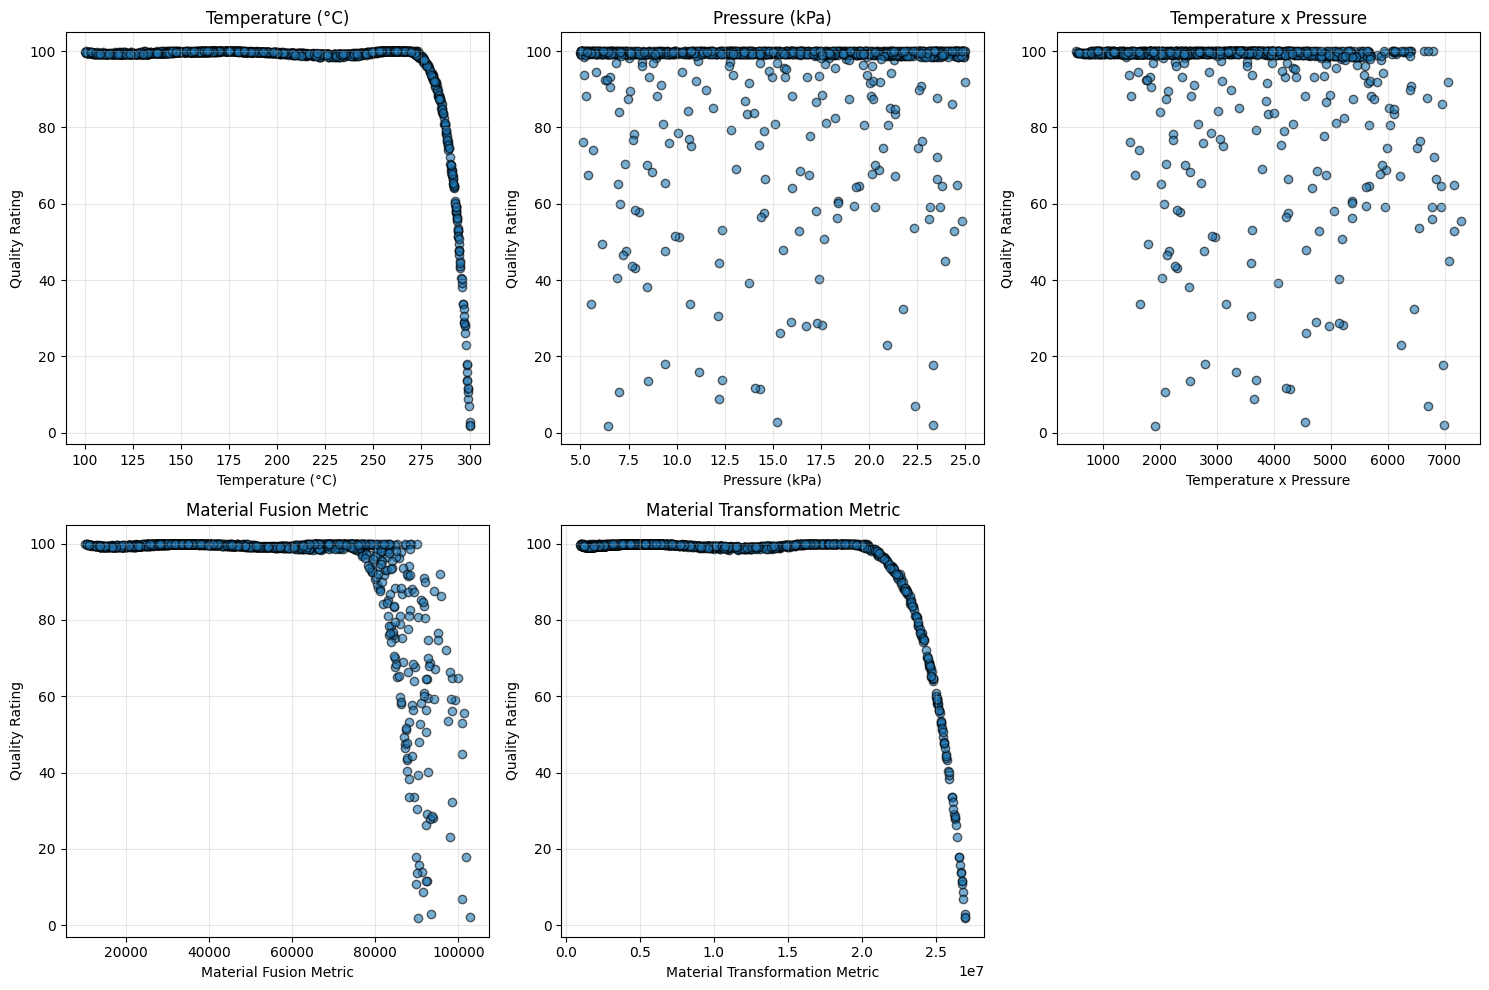

In [22]:
data=pd.read_csv("Juniors.csv")
out=pd.read_csv("output.csv")
data_cleaned = data.drop(columns=["Unnamed: 0","Unnamed: 0.1"])
features=data_cleaned.columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[feature], out["output"], alpha=0.6, edgecolor='k')
    plt.title(feature, fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel("Quality Rating", fontsize=10)
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()